In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
building_id     260601 non-null int64
damage_grade    260601 non-null int64
dtypes: int64(2)
memory usage: 4.0 MB


In [3]:
data = pd.read_csv('../data/earthquake/train_values.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
combined_data = pd.merge(data, labels, on='building_id')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [5]:
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
ageData=combined_data['age']

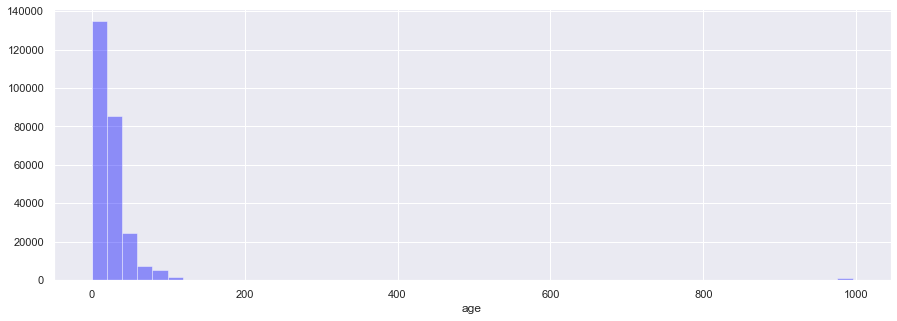

In [7]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.distplot(ageData, kde = False, color = "blue")

In [8]:
print("Number of Damage Levels :", len(combined_data["damage_grade"].unique()))
print(combined_data["damage_grade"].value_counts())

Number of Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


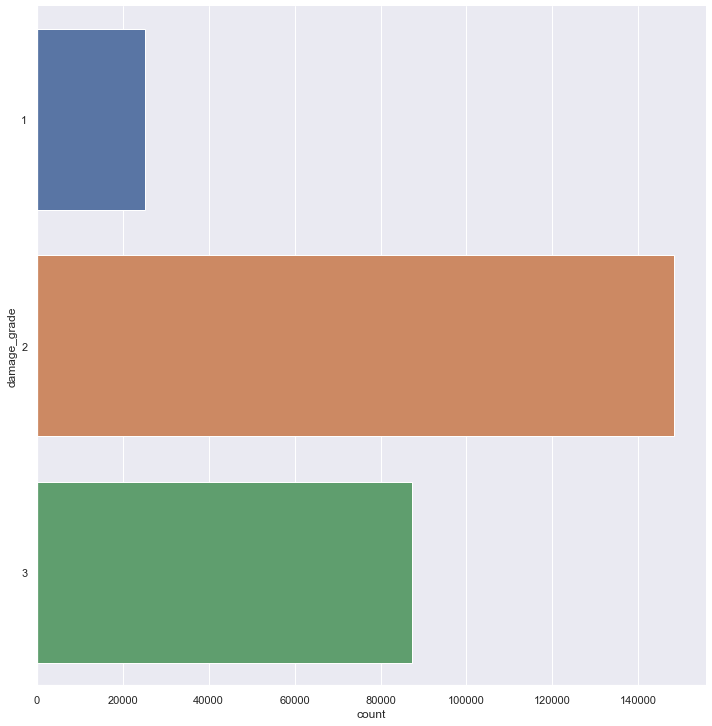

In [9]:
sb.catplot(y = "damage_grade", data = combined_data, kind = "count",height=10)

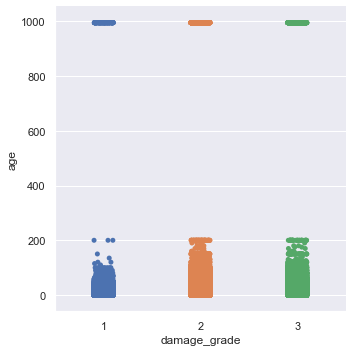

In [10]:
sb.catplot(x="damage_grade", y= "age",data =combined_data)

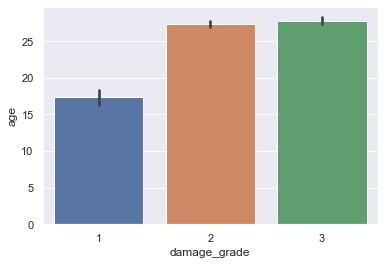

In [11]:
sb.barplot(x="damage_grade", y= "age",data =combined_data, orient = "v")

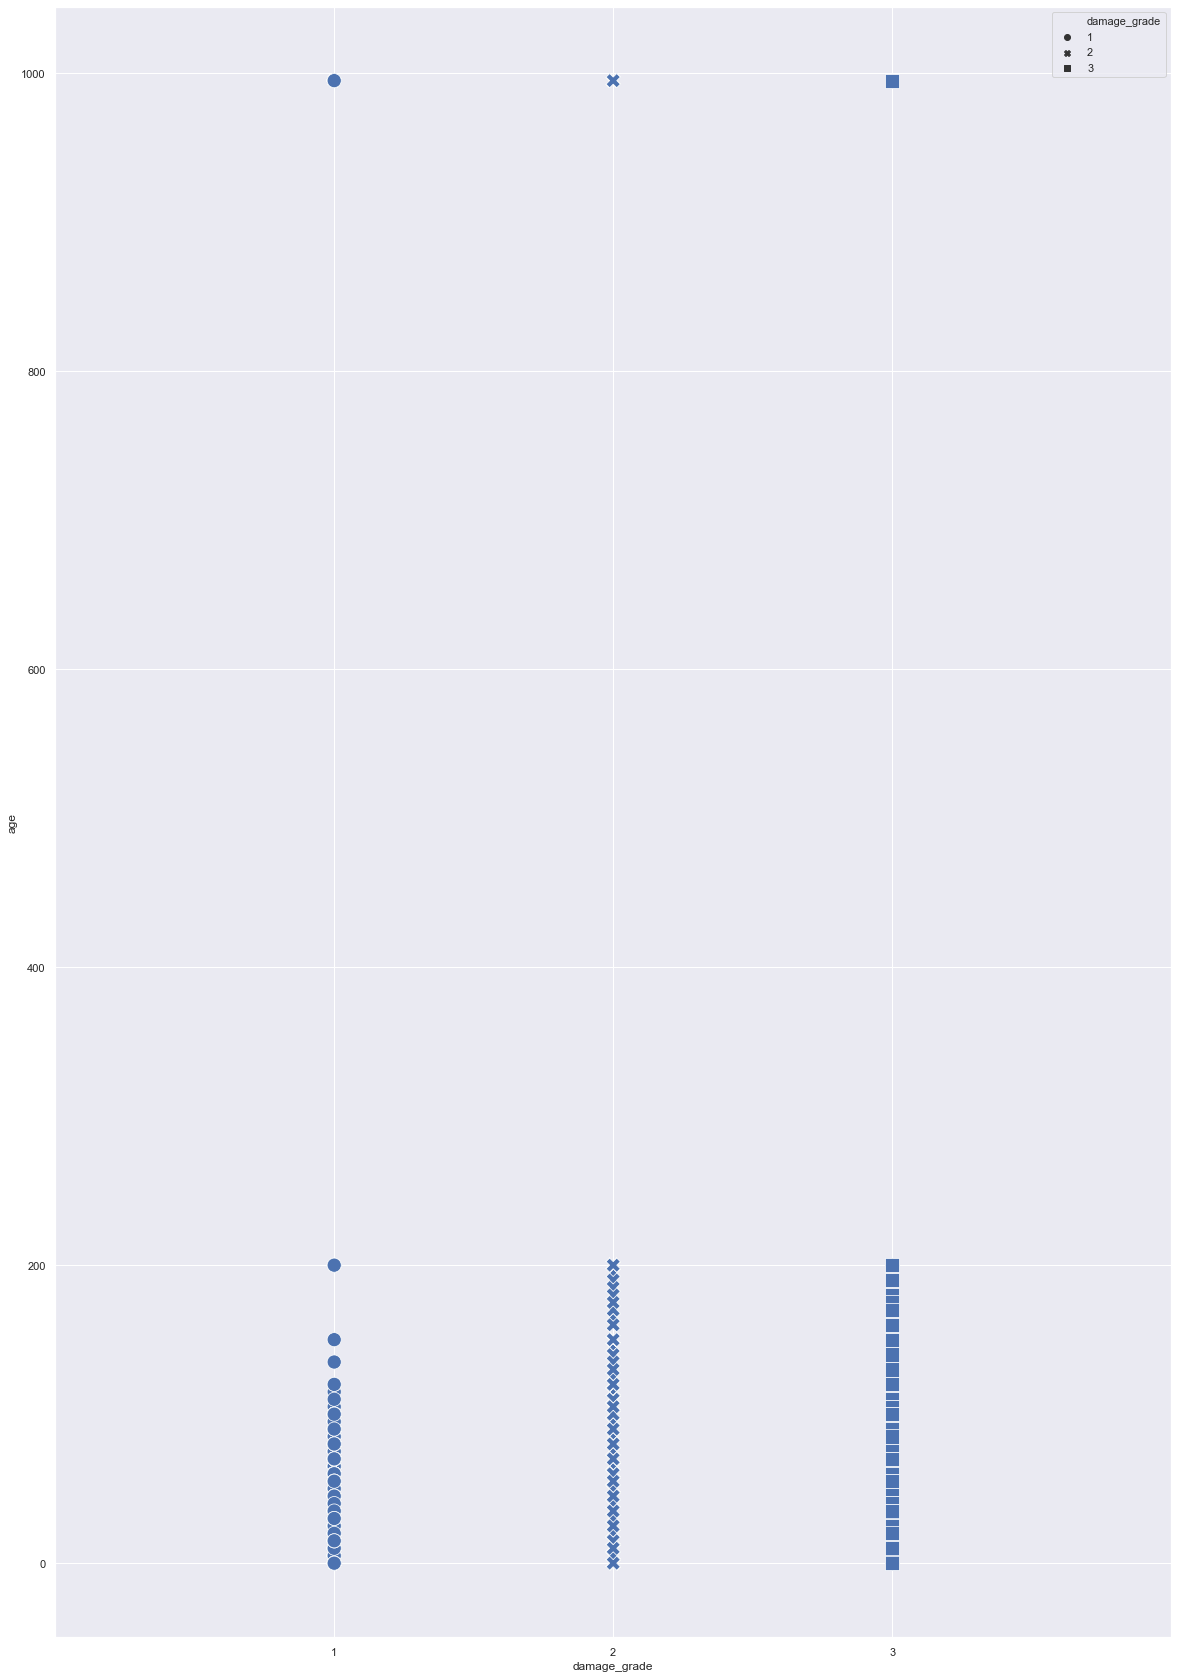

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sb.scatterplot(x="damage_grade", y= "age",data =combined_data, style = "damage_grade", s=200)
ax.set_xlim(0,4)
ax.set_xticks(range(1,4))
plt.show()


#https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

## Our usual thought will be older builings takes higher damage, but it is not true. Building of age 0 to 200 takes damage equaivalently. This could be due to buildings of diiferent materials

Text(0.5, 1.0, 'Which plan configuration contributed to most damage?')

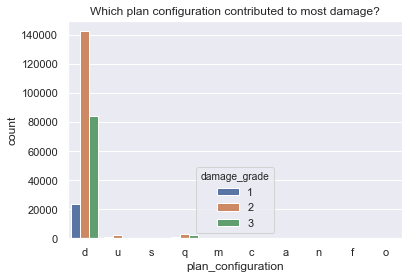

In [13]:
ax = sb.countplot(x="plan_configuration", hue="damage_grade", data=combined_data)
ax.set_title("Which plan configuration contributed to most damage?")

In [14]:
planConfigDf = combined_data['plan_configuration']
planConfigDf.head()

0    d
1    d
2    d
3    d
4    d
Name: plan_configuration, dtype: object

In [15]:
dPlans = []

for x in range(0,len(combined_data)):
    if(planConfigDf.iloc[x] == 'd'):
        dPlans.append(combined_data.iloc[x])

In [20]:
len(dPlans)

250072

In [24]:
dPlansDf = pd.DataFrame(dPlans) 

#https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

In [25]:
dPlansDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250072 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               250072 non-null int64
geo_level_1_id                            250072 non-null int64
geo_level_2_id                            250072 non-null int64
geo_level_3_id                            250072 non-null int64
count_floors_pre_eq                       250072 non-null int64
age                                       250072 non-null int64
area_percentage                           250072 non-null int64
height_percentage                         250072 non-null int64
land_surface_condition                    250072 non-null object
foundation_type                           250072 non-null object
roof_type                                 250072 non-null object
ground_floor_type                         250072 non-null object
other_floor_type                          250072 non-null object
position                                  250072 non

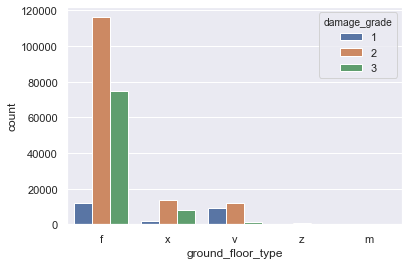

In [32]:
ax = sb.countplot(x="ground_floor_type", hue="damage_grade", data=dPlansDf)

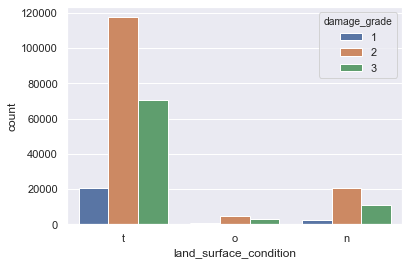

In [33]:
ax = sb.countplot(x="land_surface_condition", hue="damage_grade", data=dPlansDf)